In [1]:
# Load Hydra config in notebooks
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb
import os
from hydra import initialize_config_dir, compose
import hydra
from omegaconf import OmegaConf
abs_config_dir = os.path.abspath("config/")

with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config = compose(config_name="test_hartmann.yaml", overrides=[])
    print(OmegaConf.to_yaml(config))
    print(config)

config.sampler.conf.logger.do.online = False

dataset:
  grid_size: 10
  normalize_scores: true
  train_fraction: 1.0
  batch_size: 16
  shuffle: true
  train_path: ~/activelearning/my_package/storage/branin/data_100_train.csv
  test_path: null
  _target_: dataset.grid.HartmannDatasetHandler
oracle:
  _target_: oracle.oracle.Hartmann
  fidelity: 1
  do_domain_map: true
filter:
  _target_: filter.filter.ScoreFilter
sampler:
  _target_: my_package.sampler.sampler.RandomSampler
  conf:
    agent:
      random_action_prob: 0.0
      optimizer:
        lr: 0.0005
        n_train_steps: 5000
    logger:
      do:
        online: true
      project_name: test_gflownet
      run_name: identity_lr5e-4
    env:
      length: 10
      cell_min: 0
      cell_max: 0.99
      reward_func: power
      reward_min: 1.0e-08
      reward_beta: 1.0
      reward_norm: 1.0
surrogate:
  _target_: surrogate.surrogate.SingleTaskGPRegressor
user:
  logdir:
    root: activelearning/logs
  data:
    root: activelearning/data
device: cpu
float_precision: 32
b

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'test_hartmann.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [2]:
import torch
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = config.device
n_iterations = config.budget  # TODO: replace with budget
grid_size = config.dataset.grid_size
n_samples = config.n_samples
maximize = config.maximize

from gflownet.utils.common import set_float_precision
float_prec = set_float_precision(config.float_precision)

import matplotlib.colors as cm
import matplotlib.pyplot as plt
# colors = ["red", "blue", "green", "orange", "brown", "pink"]
colors = plt.get_cmap("Reds")

In [3]:
from dataset.grid import HartmannDatasetHandler
from surrogate.surrogate import SingleTaskGPRegressor
from sampler.sampler import GreedySampler, RandomSampler
from filter.filter import Filter, ScoreFilter
from oracle.oracle import HartmannOracle
from utils.logger import WandBLogger
from utils.plotter import ProjectionPlotHelper


# Dataset
dataset_handler = HartmannDatasetHandler(
    grid_size=grid_size,
    train_path="./storage/hartmann/data_train.csv",
    train_fraction=1.0,
    float_precision=float_prec,
)
candidate_set, _, _ = dataset_handler.get_candidate_set(step=1, as_dataloader=True)
plot_set, _, _ = dataset_handler.get_candidate_set(step=2)

# logger = WandBLogger(project_name="test_hartmann_plots", run_name="GFlowNetSampler 100x100 power")
# plotter = PlotHelper(logger)
# plotter = None #PlotHelper()
plotter = ProjectionPlotHelper(plot_set[:])

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 10.46 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.43 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=1302.08 for 250 iterations...
Iteration   50, KL divergence 5.9277, 50 iterations in 1.3383 sec
Iteration  100, KL divergence 6.0000, 50 iterations in 1.2968 sec
Iteration  150, KL divergence 6.0001, 50 iterations in 1.4371 sec
Iteration  200, KL divergence 6.0000, 50 iterations in 1.3564 sec
Iteration  250, KL divergence 6.0000, 50 iterations in 1.2704 sec
   --> Time elapsed: 6.70 seconds
===> Running optimization with exaggeration=1.00, lr=15625.00 for 500 i

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 34.8194, 50 iterations in 0.4250 sec
Iteration  100, KL divergence 31.7288, 50 iterations in 0.4753 sec
Iteration  150, KL divergence 31.7134, 50 iterations in 0.4557 sec
Iteration  200, KL divergence 31.7133, 50 iterations in 0.4534 sec
Iteration  250, KL divergence 31.7133, 50 iterations in 0.4512 sec
   --> Time elapsed: 2.26 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 28.3244, 50 iterations in 0.4349 sec
Iteration  100, KL divergence 28.2258, 50 iterations in 0.4085 sec
Iteration  150, KL divergence 28.2259, 50 iterations in 0.4313 sec
Iteration  200, KL divergence 28.2258, 50 iterations in 0.4441 sec
Iteration  250, KL divergence 28.2258, 50 iterations in 0.4499 sec
   --> Time elapsed: 2.17 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 43.3005, 50 iterations in 0.4304 sec
Iteration  100, KL divergence 43.2929, 50 iterations in 0.4604 sec
Iteration  150, KL divergence 43.2044, 50 iterations in 0.4745 sec
Iteration  200, KL divergence 43.2060, 50 iterations in 0.4724 sec
Iteration  250, KL divergence 43.2061, 50 iterations in 0.4779 sec
   --> Time elapsed: 2.32 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 40.0355, 50 iterations in 0.4247 sec
Iteration  100, KL divergence 39.7472, 50 iterations in 0.4574 sec
Iteration  150, KL divergence 39.7410, 50 iterations in 0.4661 sec
Iteration  200, KL divergence 39.7412, 50 iterations in 0.4708 sec
Iteration  250, KL divergence 39.7412, 50 iterations in 0.4601 sec
   --> Time elapsed: 2.28 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 36.6028, 50 iterations in 0.3980 sec
Iteration  100, KL divergence 36.5992, 50 iterations in 0.3994 sec
Iteration  150, KL divergence 36.5991, 50 iterations in 0.3973 sec
Iteration  200, KL divergence 36.5991, 50 iterations in 0.4067 sec
Iteration  250, KL divergence 36.5991, 50 iterations in 0.4807 sec
   --> Time elapsed: 2.08 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 39.8495, 50 iterations in 0.4200 sec
Iteration  100, KL divergence 36.4285, 50 iterations in 0.4115 sec
Iteration  150, KL divergence 36.3924, 50 iterations in 0.4138 sec
Iteration  200, KL divergence 36.3925, 50 iterations in 0.4111 sec
Iteration  250, KL divergence 36.3920, 50 iterations in 0.4106 sec
   --> Time elapsed: 2.07 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 37.7184, 50 iterations in 0.4246 sec
Iteration  100, KL divergence 37.7189, 50 iterations in 0.4170 sec
Iteration  150, KL divergence 37.7190, 50 iterations in 0.4955 sec
Iteration  200, KL divergence 37.7190, 50 iterations in 0.4771 sec
Iteration  250, KL divergence 37.7190, 50 iterations in 0.4379 sec
   --> Time elapsed: 2.25 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 26.0298, 50 iterations in 0.4595 sec
Iteration  100, KL divergence 26.0282, 50 iterations in 0.4609 sec
Iteration  150, KL divergence 26.0282, 50 iterations in 0.4649 sec
Iteration  200, KL divergence 26.0282, 50 iterations in 0.4558 sec
Iteration  250, KL divergence 26.0282, 50 iterations in 0.4428 sec
   --> Time elapsed: 2.29 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 21.5849, 50 iterations in 0.4545 sec
Iteration  100, KL divergence 21.5854, 50 iterations in 0.4662 sec
Iteration  150, KL divergence 21.5854, 50 iterations in 0.4515 sec
Iteration  200, KL divergence 21.5854, 50 iterations in 0.4614 sec
Iteration  250, KL divergence 21.5854, 50 iterations in 0.4550 sec
   --> Time elapsed: 2.29 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 22.7723, 50 iterations in 0.4432 sec
Iteration  100, KL divergence 22.7724, 50 iterations in 0.4802 sec
Iteration  150, KL divergence 22.7724, 50 iterations in 0.4350 sec
Iteration  200, KL divergence 22.7724, 50 iterations in 0.4397 sec
Iteration  250, KL divergence 22.7724, 50 iterations in 0.4661 sec
   --> Time elapsed: 2.27 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

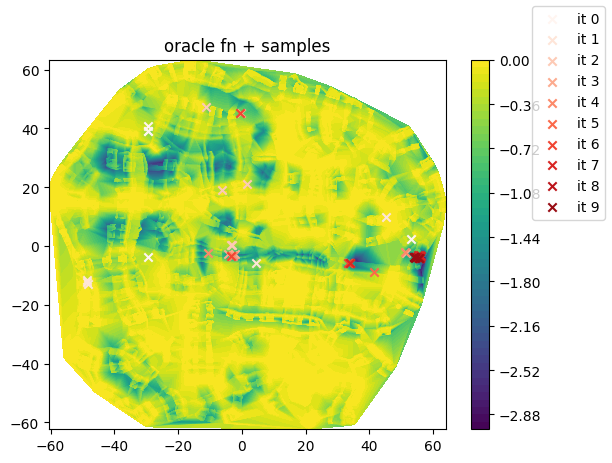

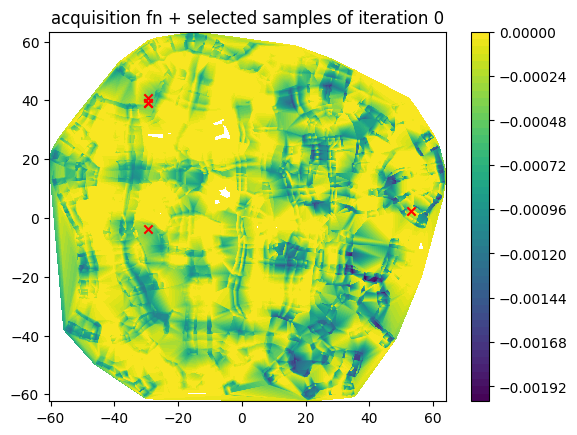

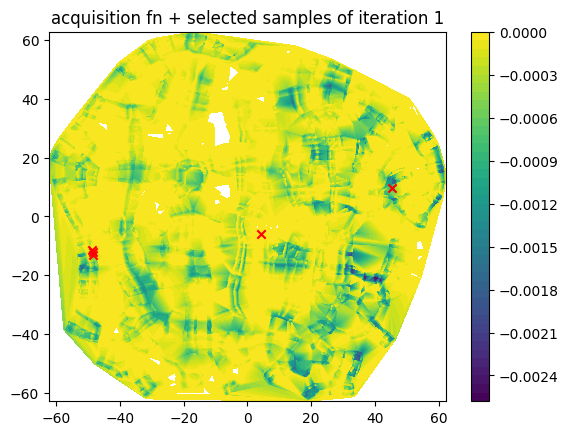

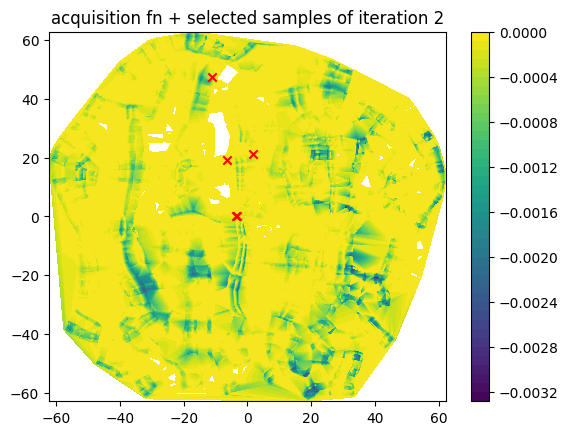

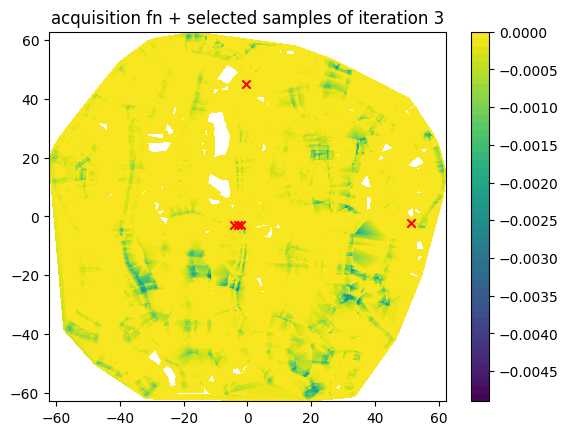

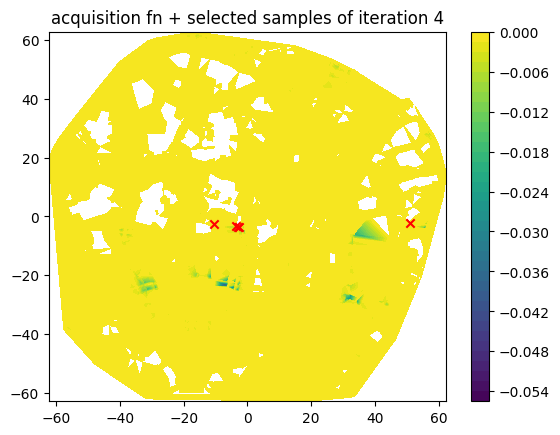

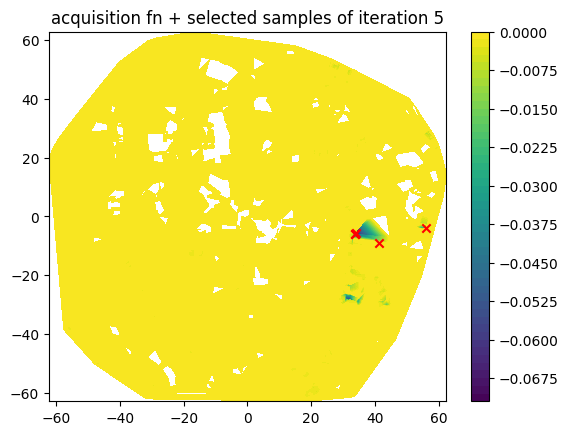

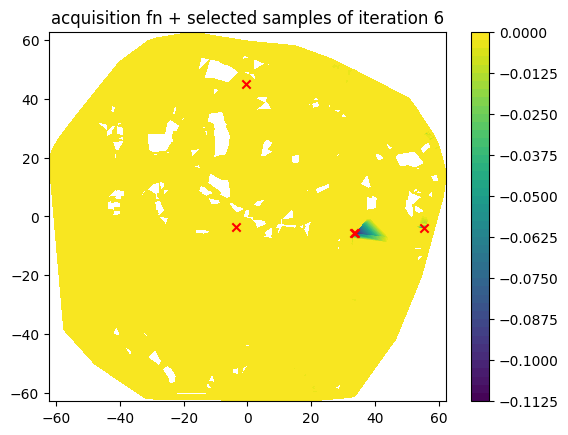

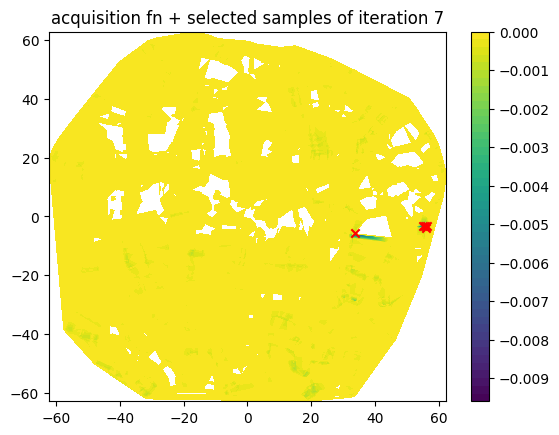

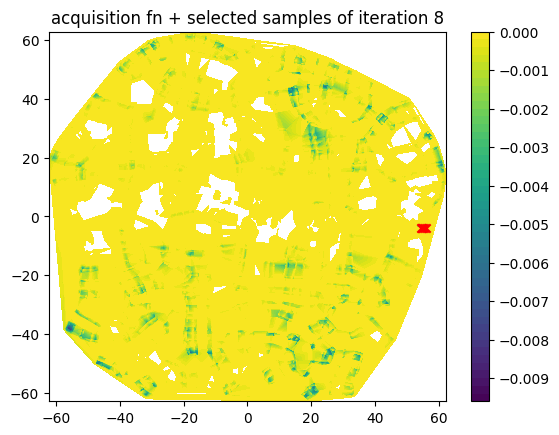

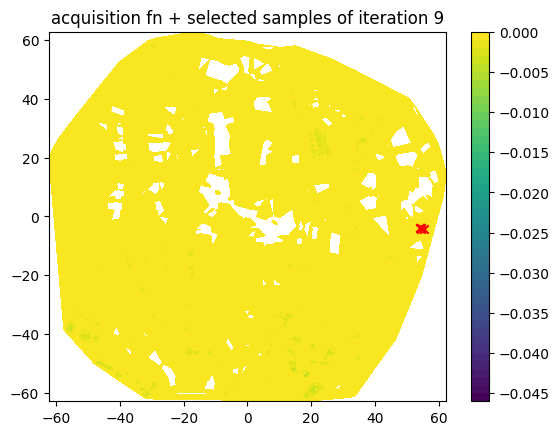

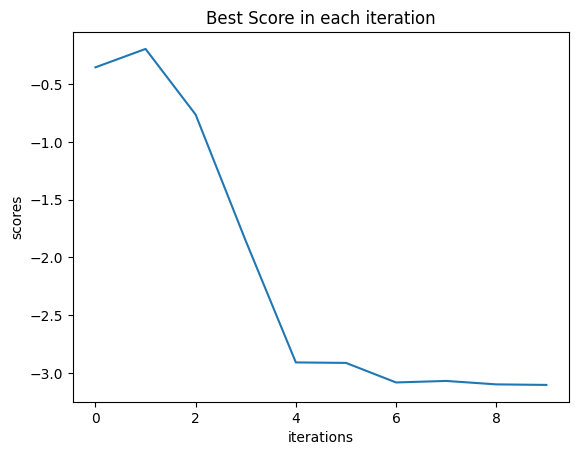

In [4]:
# Oracle
oracle = HartmannOracle(fidelity=1, device=device, float_precision=float_prec)

if plotter is not None:
    fig_oracle, ax_oracle = plotter.plot_function(oracle)


best_scores = []

for i in range(n_iterations):

    train_data, test_data = dataset_handler.get_dataloader()
    # print("iteration", i)
    # Surrogate (e.g., Bayesian Optimization)
    # starts with a clean slate each iteration
    surrogate = SingleTaskGPRegressor(
        float_precision=float_prec, device=device, maximize=maximize
    )
    surrogate.fit(train_data)

    # Sampler (e.g., GFlowNet, or Random Sampler)
    # also starts with a clean slate; TODO: experiment with NOT training from scratch
    # sampler = RandomSampler(
    #     surrogate,
    #     device=device,
    #     float_precision=float_prec,
    # )
    sampler = GreedySampler(
        surrogate,
        device=device,
        float_precision=float_prec,
    )
    # sampler = hydra.utils.instantiate(
    #     config.sampler,
    #     surrogate=surrogate,
    #     device=device,
    #     float_precision=float_prec,
    #     _recursive_=False,
    # )

    sampler.fit()  # only necessary for samplers that train a model

    samples = sampler.get_samples(n_samples * 3, candidate_set=candidate_set)

    # Filter
    filter = Filter()
    filtered_samples = filter(n_samples=n_samples, candidate_set=samples.clone())

    if plotter is not None:
        fig_acq, ax_acq = plotter.plot_function(surrogate)
        fig_acq, ax_acq = plotter.plot_samples(filtered_samples, ax_acq, fig_acq)
        ax_acq.set_title("acquisition fn + selected samples of iteration %i" % i)
        plotter.log_figure(fig_acq, "acq")

    if plotter is not None:
        fig_acq, ax_acq = plotter.plot_samples(
            filtered_samples,
            ax_oracle,
            fig_oracle,
            c=cm.to_hex(colors(i / n_iterations)),
            label="it %i" % i,
        )

    del surrogate
    del sampler
    del filter

    scores = oracle(filtered_samples.clone())
    dataset_handler.update_dataset(filtered_samples.cpu(), scores.cpu())
    best_scores.append(scores.min().cpu())

if plotter is not None:
    fig_oracle.legend()
    ax_oracle.set_title("oracle fn + samples")
    plotter.log_figure(fig_oracle, key="oracle")


fig = plt.figure()
plt.plot(best_scores)
plt.xlabel("iterations")
plt.ylabel("scores")
plt.title("Best Score in each iteration")
if plotter is not None:
    plotter.log_figure(fig, key="best_scores")